<a href="https://colab.research.google.com/github/carlosmding/PDI_SecondProject/blob/main/RedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import os, sys
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rutaPath = '/content/drive/MyDrive/Second_PDI'
%cd '/content/drive/MyDrive/Second_PDI'

/content/drive/MyDrive/Second_PDI


### **Cargar Vector caracteristicas HOG y vector de Salidas**

In [19]:
x = np.load(rutaPath + '/vectorTraining.npy')
print(x.shape)

y = np.load(rutaPath + '/vectorY.npy')
print(y.shape)


(333, 1764)
(333,)


- 333 muestras
- 1764 caracteristicas HOG

### Conversión salidas a categorical (One Hot Encode)

In [9]:
y_categorical = to_categorical(y, num_classes=4)

### Selección del Train/Test

In [15]:
# 70% Train y 30% Test
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.3,random_state=109)

print(x_train.shape)
print(y_test.shape)

(233, 1764)
(100, 4)


##Programación Red Neuronal

In [34]:
input_dim = 1764

# Definir el modelo
model = Sequential()

# Primera capa
model.add(Dense(64, activation='relu', input_dim=input_dim))

# Capa de dropout
model.add(Dropout(0.2))

# Otra capa
model.add(Dense(128, activation='relu', input_dim=input_dim))

# Capa de salida
model.add(Dense(4, activation='softmax'))

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenar modelo
model.fit(x_train, y_train, epochs=1000, batch_size=200, validation_data=(x_test, y_test))

# Evaluación y predicción
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy: {}".format(test_accuracy))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                112960    
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dense_27 (Dense)            (None, 4)                 516       
                                                                 
Total params: 121,796
Trainable params: 121,796
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 252ms/step - loss: 1.3357 - accuracy: 0.4249 - val_loss: 1.1628 - val_accuracy: 0.4800
Epoch 2/1000
2/2 [===================

### Métricas

In [54]:
# make predictions on the test set
y_pred = model.predict(x_test)

# convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# convert the y_test to class labels
y_test_mod = np.argmax(y_test, axis=1)

print(y_test[0:10])
print(y_pred_classes[0:10])

#Error en el último valor (9/10)


4/4 [==============================] - 0s 5ms/step
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
[0 2 2 1 2 3 3 2 2 3]


### Matriz de confusión
La matriz de confusión de un problema de clase n es una matríz nxnen la que las filas se nombran según las clases reales y las columnas, según las clases previstas por el modelo. Sirve para mostrar de forma explícita cuándo una clase es confundida con otra. Por eso, permite trabajar de forma separada con distintos tipos de error.

### Precisión
Permite medir la calidad del modelo de machine learning en tareas de clasificación. Se calcula verdaderos positivos sobre el total de positivos (verdaderos y falsos).

### Recall (Exhaustividad) - Sensibilidad
Permite identificar la cantidad que el modelo de machine learning es capaz de identificar. Se calcula los verdaderos positivos sobre el total de muestras que debia identificar.

Parámetro average
- 'binary':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

- 'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

- 'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

- 'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

- 'samples':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

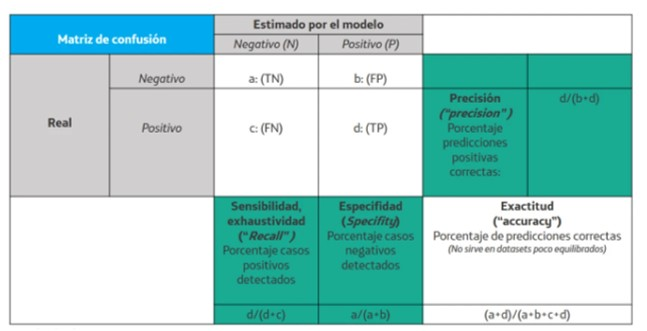

In [60]:
grad = cv.imread("/content/metricas.jpg")
cv2_imshow(grad)

In [62]:
# calculate the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_mod, y_pred_classes)
print("Matrix de confusión")
print(conf_matrix)
print("\n")

precision = metrics.precision_score(y_test_mod, y_pred_classes, average="macro")
print("Precisión")
print(precision)
print("\n")

recall = metrics.recall_score(y_test_mod, y_pred_classes, average="macro")
print("Recall o sensibilidad")
print(recall)


Matrix de confusión
[[12  1  0  1]
 [ 1 19  6  0]
 [ 1  4 42  1]
 [ 1  0  0 11]]


Precisión
0.8282051282051283


Recall o sensibilidad
0.8448946886446885


### Exportar modelo

In [63]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

In [64]:
model.save_weights("fashion_model.h5")